<a href="https://colab.research.google.com/github/taehyunKIMGH/python_cctv_data/blob/main/%EA%B9%80%ED%83%9C%ED%98%84.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import matplotlib.pyplot as plt
import csv
import pandas as pd
from scipy.stats import pearsonr
import numpy as np

cctv 개수<br>[사용한 데이터 출처](https://kosis.kr/statHtml/statHtml.do?orgId=127&tblId=DT_2014_82)

In [2]:

f_cctv = open('/content/CCTV_설치_운영_현황_20230216233331.csv', encoding = 'cp949')
data_cctv = csv.reader(f_cctv)
cctv = []

for row in data_cctv:
  if '지역별' in row[0]:
    cctv.append(int(row[8]))

범죄 건수와 범죄 검거 건수<br>[사용한 데이터 출처](https://kosis.kr/statHtml/statHtml.do?orgId=101&tblId=DT_1YL20321&conn_path=I2)



In [3]:
f_arrest = open('/content/중요범죄발생및검거현황_시도__20230216233349.csv', encoding='cp949')
data_arrest =  csv.reader(f_arrest)
crime = []
arrest = []

for row in data_arrest:
  if '전국' not in row[0]:
    if '경찰청' not in row[0]:
      if '해양경비 안전본부' not in row[0]:
        if '총범죄' in row[1]:
          crime.append(row[2])
          arrest.append(row[3])

print(crime,arrest)


['257969', '100439', '67915', '76584', '39392', '39982', '29085', '5937', '357243', '39593', '43397', '54223', '43650', '48380', '65553', '87879', '25515'] ['189140', '78412', '54752', '60697', '33461', '31997', '24062', '4062', '282646', '33202', '34798', '42505', '35661', '39959', '54086', '70058', '20222']


범죄 검거율

In [4]:
arrest_rate = []

for i in range(len(crime)):
  arrest_rate.append((int(arrest[i])/int(crime[i]))*100)


print(arrest_rate)

[73.31888715310755, 78.06927587889166, 80.61842008392844, 79.25545805912462, 84.94364337936638, 80.02851283077385, 82.72992951693313, 68.41839312784235, 79.11869511788895, 83.85825777283863, 80.18526626264489, 78.38924441657599, 81.69759450171821, 82.59404712691195, 82.50728418226473, 79.72097998384142, 79.25533999608074]


지역의 면적<br>[사용한 데이터 출처](https://kosis.kr/statHtml/statHtml.do?orgId=101&tblId=DT_1ZGA17&conn_p-ath=I2)

In [5]:
area = []

data_area = pd.read_csv('/content/지역별_면적_20230216233535.csv', skiprows=17, header=None, encoding = 'cp949')

for row in data_area[5]:
  area.append(row)

print(area)

 

[605, 770, 884, 1066, 501, 540, 1062, 465, 10197, 16830, 7407, 8247, 8072, 12359, 19035, 10542, 1850]


지역 면적 / cctv 개수

In [6]:
cctv_area = []

for i in range(len(area)):
  cctv_area.append(int(area[i]*1000000)/int(cctv[i]))

print(cctv_area)

[333.1778503365096, 3180.687854729311, 1433.5848052984256, 3183.400923365446, 1769.1927396002543, 2423.7745351065787, 8973.38403041825, 2665.1535472333985, 5261.6777822211325, 60324.094152899896, 30269.84172391387, 30881.04786618587, 37827.80662455246, 45305.91297334946, 54338.67252064641, 16184.598378776713, 35837.43365231878]


시각화

<function matplotlib.pyplot.show(*args, **kw)>

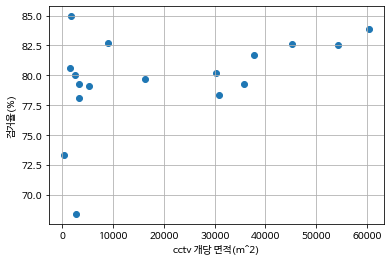

In [7]:
plt.rc('font', family='NanumBarunGothic') 
plt.scatter(cctv_area,arrest_rate)
plt.xlabel('cctv 개당 면적(m^2)')
plt.ylabel('검거율(%)')
plt.grid(True)
plt.show

한국어가 안나오는 문제가 발생!!!!

한국어 폰트 설치

In [8]:
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

Reading package lists... Done
Building dependency tree       
Reading state information... Done
fonts-nanum is already the newest version (20180306-3).
The following package was automatically installed and is no longer required:
  libnvidia-common-510
Use 'sudo apt autoremove' to remove it.
0 upgraded, 0 newly installed, 0 to remove and 21 not upgraded.
/usr/share/fonts: caching, new cache contents: 0 fonts, 1 dirs
/usr/share/fonts/truetype: caching, new cache contents: 0 fonts, 3 dirs
/usr/share/fonts/truetype/humor-sans: caching, new cache contents: 1 fonts, 0 dirs
/usr/share/fonts/truetype/liberation: caching, new cache contents: 16 fonts, 0 dirs
/usr/share/fonts/truetype/nanum: caching, new cache contents: 10 fonts, 0 dirs
/usr/local/share/fonts: caching, new cache contents: 0 fonts, 0 dirs
/root/.local/share/fonts: skipping, no such directory
/root/.fonts: skipping, no such directory
/usr/share/fonts/truetype: skipping, looped directory detected
/usr/share/fonts/truetype/humor-san

다시 시각화 불러오기

<function matplotlib.pyplot.show(*args, **kw)>

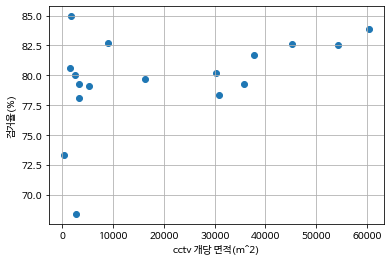

In [9]:
plt.rc('font', family='NanumBarunGothic') 
plt.scatter(cctv_area,arrest_rate)
plt.xlabel('cctv 개당 면적(m^2)')
plt.ylabel('검거율(%)')
plt.grid(True)
plt.show

여기서 어떤 점이 어디를 뜻하는지 확인 할 수 없음!

범례 추가

In [10]:
f_place = open('/content/CCTV_설치_운영_현황_20230216233331.csv', encoding = 'cp949')
place_data = csv.reader(f_place)
place = []

for row in place_data:
  if '지역별' in row[0]:
    place.append(row[1])

print(place)

['서울', '부산', '대구', '인천', '광주', '대전', '울산', '세종', '경기', '강원', '충북', '충남', '전북', '전남', '경북', '경남', '제주']


<function matplotlib.pyplot.show(*args, **kw)>

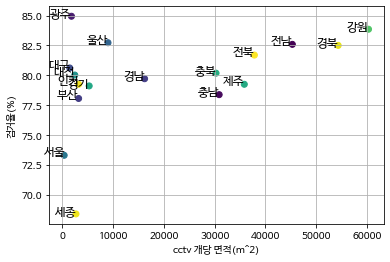

In [13]:
plt.rc('font', family='NanumBarunGothic') 
colors = np.random.rand(len(place))
plt.scatter(cctv_area,arrest_rate, c = colors)
plt.xlabel('cctv 개당 면적(m^2)')
plt.ylabel('검거율(%)')
for i in range(len(place)):
  plt.text(cctv_area[i], arrest_rate[i], place[i],horizontalalignment='right', fontsize = '12')
plt.grid(True)
plt.show

피어슨 상관계수

In [12]:
print(pearsonr(cctv_area, arrest_rate))

(0.43691416357534146, 0.07949716390378787)
